In [2]:
import pandas as pd

df = pd.read_excel('/Users/samarth/Downloads/income.xlsx')
features = df[['Period End Date', 'Revenue', 'Net Income', 'Gross Profit', 
               'Normalized EBITDA', 'Income Tax - Total','Total Operating Expense']]

features.columns = ['Date', 'Revenue', 'Net Income', 'Gross Profit', 'EBITDA', 'Income Tax', 'Total Operating Expenses']

features

,Date,Revenue,Net Income,Gross Profit,EBITDA,Income Tax,Total Operating Expenses
0,30-Jun-2024,1402256,17898,483795,234420,7259,1324958
1,31-Mar-2024,1265394,21491,470308,269917,56889,1152778
2,31-Dec-2023,1240457,42481,481115,263319,22914,1128119
3,30-Sep-2023,1240199,29288,457117,240055,17272,1148479
4,30-Jun-2023,1287659,33817,467201,242210,28313,1181560
5,31-Mar-2023,1123457,50980,418831,216781,18720,1037663
6,31-Dec-2022,1093929,37379,438452,237189,25689,988793
7,30-Sep-2022,1086200,26740,429692,230846,24865,987947
8,30-Jun-2022,872891,18854,401952,200786,11797,799962
9,31-Mar-2022,766330,-2177,356367,166374,-401,728548


Data Shape: (41, 7)

Last few quarters of data:
            Date  Net Income
36  30-Jun-2023        33817
37  30-Sep-2023        29288
38  31-Dec-2023        42481
39  31-Mar-2024        21491
40  30-Jun-2024        17898

Predicting with LSTM Model:
Epoch 100/200, Average Loss: 0.001261
Epoch 200/200, Average Loss: 0.001208
                   Period  Net Income  Quarter-over-Quarter Change %
0            Last Quarter    17898.00                            NaN
1  Predicted Next Quarter    18364.56                           2.61

Predicting with GRU Model:
Epoch 100/200, Average Loss: 0.001156
Epoch 200/200, Average Loss: 0.001213
                   Period  Net Income  Quarter-over-Quarter Change %
0            Last Quarter    17898.00                            NaN
1  Predicted Next Quarter    19182.21                           7.18

Predicting with CNN-LSTM Model:
Epoch 100/200, Average Loss: 0.001128
Epoch 200/200, Average Loss: 0.000870
                   Period  Net Income  Quarter

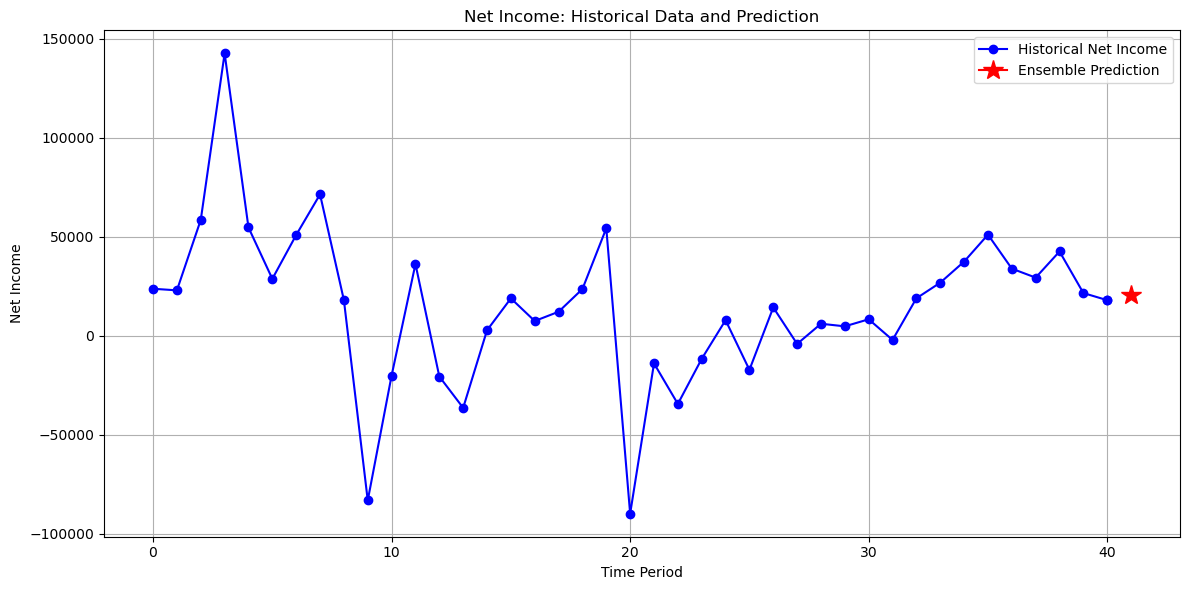


Summary Statistics for Net Income:
count        41.00
mean      14910.00
std       39338.84
min      -89906.00
25%       -2177.00
50%       17930.00
75%       33817.00
max      142514.00
Name: Net Income, dtype: float64

Recent Quarterly Growth Rates:
36   -33.67
37   -13.39
38    45.05
39   -49.41
40   -16.72
Name: Net Income, dtype: float64


In [14]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Model Definitions
class LSTMNet(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=32, output_size=1):
        super(LSTMNet, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=2, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_layer_size, output_size)
    
    def forward(self, x):
        if len(x.shape) == 2:
            x = x.unsqueeze(-1)
        lstm_out, _ = self.lstm(x)
        predictions = self.fc(lstm_out[:, -1])
        return predictions

class GRUNet(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1):
        super(GRUNet, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        if len(x.shape) == 2:
            x = x.unsqueeze(-1)
        gru_out, _ = self.gru(x)
        predictions = self.fc(gru_out[:, -1])
        return predictions

class CNNLSTMNet(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1):
        super(CNNLSTMNet, self).__init__()
        self.conv1 = nn.Conv1d(input_size, 32, kernel_size=2)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=2)
        self.lstm = nn.LSTM(64, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        if len(x.shape) == 2:
            x = x.unsqueeze(-1)
        x = x.permute(0, 2, 1)
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = x.permute(0, 2, 1)
        lstm_out, _ = self.lstm(x)
        predictions = self.fc(lstm_out[:, -1])
        return predictions

class SimpleRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_size=1):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        if len(x.shape) == 2:
            x = x.unsqueeze(-1)
        rnn_out, _ = self.rnn(x)
        predictions = self.fc(rnn_out[:, -1])
        return predictions

def prepare_sequences(data, sequence_length=4):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:(i + sequence_length)])
        targets.append(data[i + sequence_length])
    return np.array(sequences), np.array(targets)

def predict_with_model(model_class, df, sequence_length=4, epochs=200, batch_size=16, lr=0.001):
    try:
        # Prepare data
        net_income = df['Net Income'].values.reshape(-1, 1)
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(net_income)
        
        # Prepare sequences
        X, y = prepare_sequences(scaled_data, sequence_length)
        X = torch.FloatTensor(X)
        y = torch.FloatTensor(y)
        
        # Initialize model
        model = model_class()
        loss_function = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        
        # Training
        for epoch in range(epochs):
            model.train()
            total_loss = 0
            for i in range(0, len(X), batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                
                optimizer.zero_grad()
                y_pred = model(X_batch)
                loss = loss_function(y_pred, y_batch)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            
            if (epoch + 1) % 100 == 0:
                print(f'Epoch {epoch+1}/{epochs}, Average Loss: {total_loss/len(X):.6f}')
        
        # Make prediction
        last_sequence = scaled_data[-sequence_length:]
        last_sequence = torch.FloatTensor(last_sequence).unsqueeze(0)
        
        model.eval()
        with torch.no_grad():
            prediction_scaled = model(last_sequence).numpy()
        
        prediction = scaler.inverse_transform(prediction_scaled)
        
        results = pd.DataFrame({
            'Period': ['Last Quarter', 'Predicted Next Quarter'],
            'Net Income': [
                net_income[-1][0],
                prediction[0][0]
            ]
        })
        
        results['Quarter-over-Quarter Change %'] = [
            np.nan,
            ((prediction[0][0] - net_income[-1][0]) / net_income[-1][0] * 100)
        ]
        
        return results.round(2)
    
    except Exception as e:
        print(f"Error during prediction: {str(e)}")
        return None

def plot_predictions(df, ensemble_results):
    plt.figure(figsize=(12, 6))
    
    # Plot historical data
    plt.plot(range(len(df)), df['Net Income'], 
             marker='o', label='Historical Net Income', color='blue')
    
    # Plot prediction
    plt.plot(len(df)-1, ensemble_results.iloc[0]['Net Income'], 
             marker='o', color='blue')  # Last actual point
    plt.plot(len(df), ensemble_results.iloc[1]['Net Income'], 
             marker='*', color='red', markersize=15, label='Ensemble Prediction')
    
    plt.title('Net Income: Historical Data and Prediction')
    plt.xlabel('Time Period')
    plt.ylabel('Net Income')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def ensemble_predict(df, sequence_length=4, epochs=200, batch_size=16):
    try:
        predictions = {}
        
        weighted_models = {
            'LSTM': (LSTMNet, 0.40),
            'GRU': (GRUNet, 0.20),
            'CNN-LSTM': (CNNLSTMNet, 0.25),
            'RNN': (SimpleRNN, 0.15)
        }
        
        weighted_pred = 0
        # Store individual predictions
        all_predictions = {}
        
        for model_name, (model_class, weight) in weighted_models.items():
            print(f"\nPredicting with {model_name} Model:")
            results = predict_with_model(model_class, df, sequence_length, epochs, batch_size)
            weighted_pred += results.iloc[1]['Net Income'] * weight
            
            # Print individual model results
            print(results)
            all_predictions[model_name] = results.iloc[1]['Net Income']
        
        final_results = pd.DataFrame({
            'Period': ['Last Quarter', 'Predicted Next Quarter'],
            'Net Income': [
                df['Net Income'].iloc[-1],
                weighted_pred
            ],
            'Quarter-over-Quarter Change %': [
                np.nan,
                ((weighted_pred - df['Net Income'].iloc[-1]) / df['Net Income'].iloc[-1] * 100)
            ]
        })
        
        print("\nEnsemble Model (Weighted Prediction):")
        print(final_results)
        
        print("\nIndividual Model Contributions:")
        for model_name, (_, weight) in weighted_models.items():
            contribution = all_predictions[model_name] * weight
            print(f"{model_name}: Prediction = {all_predictions[model_name]:.2f}, "
                  f"Weight = {weight:.2%}, Contribution = {contribution:.2f}")
        
        return final_results.round(2)
    
    except Exception as e:
        print(f"Error in ensemble prediction: {str(e)}")
        return None

# Load and prepare data
df = pd.read_excel('/Users/samarth/Downloads/income.xlsx')
features = df[['Period End Date', 'Revenue', 'Net Income', 'Gross Profit', 
               'Normalized EBITDA', 'Income Tax - Total', 'Total Operating Expense']]
features.columns = ['Date', 'Revenue', 'Net Income', 'Gross Profit', 'EBITDA', 
                   'Income Tax', 'Total Operating Expenses']
features = features.iloc[::-1].reset_index(drop=True)

# Run prediction and visualization
print("Data Shape:", features.shape)
print("\nLast few quarters of data:")
print(features[['Date', 'Net Income']].tail())

ensemble_results = ensemble_predict(features[['Net Income']], 
                                 sequence_length=4,
                                 epochs=200,
                                 batch_size=16)

plot_predictions(features[['Net Income']], ensemble_results)

print("\nSummary Statistics for Net Income:")
print(features['Net Income'].describe().round(2))

print("\nRecent Quarterly Growth Rates:")
growth_rates = features['Net Income'].pct_change() * 100
print(growth_rates.tail().round(2))
